In [1]:
TEST = True

Check which hyper-parameters are required by Region:

In [2]:
from pykeen.kge_models import Region
Region.hyper_params

['embedding_dim',
 'margin_loss',
 'learning_rate',
 'corrupt_relations',
 'normalization_of_entities',
 'init_radius',
 'reg_lambda',
 'loss_type',
 'neg_factor',
 'region_type']

Train and evaluate Region (provide test set):
* Define the path to our test set: **test_set_path**
* Define the path to our the negative test set: **neg_test_path** in case of triple classfication evaluation
* Define whether you want to compute the metrics (mean rank and hits@k) in raw or in a filtered setting: **filter_negative_triples**

In [3]:
config = dict(
    metrics                     = ['mean_rank'],
    training_set_path           = 'D:/uni/master/data/FB15K/train.tsv',
    test_set_path               = 'D:/uni/master/data/FB15K/valid_150.tsv',
    mapping_path                = 'D:/uni/master/data/fb15k/',
    execution_mode              = 'Training_mode',
    random_seed                 = 2,
    
    kg_embedding_model_name     = 'Region',
    region_type                 = 'sphere',
    embedding_dim               = 50,
    init_radius                 = 0,
    reg_lambda                  = 0.01,
    loss_type                   = 'NLL',
    neg_factor                  = 5,
    corrupt_relations           = False,
 
    normalization_of_entities   = 2,  # corresponds to L2
    margin_loss                 = 0.0,
    learning_rate               = 0.01,
    es_metric                   = 'custom',
    num_epochs                  = 1000,  
    batch_size                  = 2048,
    test_batch_size             = 6000,
    filter_negative_triples     = False,
    preferred_device            = 'gpu'
)

In [4]:
output_directory = 'D:/uni/master/models/region_FB15k_dim{}_{}_rad{}_regL{}_lr{}_loss-{}_margin{}_negfactor{}_epochs{}/'.format(
    config['embedding_dim'], config['region_type'], config['init_radius'], 
    str(config['reg_lambda']).replace('.',''), 
    str(config['learning_rate']).replace('.',''),
    config['loss_type'],
    config['margin_loss'],
    config['neg_factor'],
    config['num_epochs']
)
output_directory

'D:/uni/master/models/region_FB15k_dim50_sphere_rad0_regL001_lr001_loss-NLL_margin0.0_negfactor5_epochs1000/'

In [5]:
if TEST:
    output_directory = 'D:/uni/master/models/test/'

In [6]:
import logging
import os
import sys
import time
import pykeen

In [7]:
logging.basicConfig(level=logging.DEBUG)
logging.getLogger('pykeen').setLevel(logging.DEBUG)

In [8]:
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [9]:
print(time.asctime())

Fri Jun 28 23:57:14 2019


In [10]:
print(pykeen.get_version())

0.0.26-dev


## Train and evaluate Region:

In [11]:
import numpy as np
import matplotlib.pyplot as plt

DEBUG:matplotlib:$HOME=C:\Users\aquam
DEBUG:matplotlib:CONFIGDIR=C:\Users\aquam\.matplotlib
DEBUG:matplotlib:matplotlib data path: D:\uni\master\conda_env\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file D:\uni\master\conda_env\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.3
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32


DEBUG:matplotlib:loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', 'encodings.cp1251', 'site', 'os', 'errno', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_bootlocale', '_locale', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', 're', 'enum', 'sre_compile'

DEBUG:matplotlib:CACHEDIR=C:\Users\aquam\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\aquam\.matplotlib\fontlist-v300.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [12]:
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [13]:
# my
results = pykeen.run(
    config=config,
    output_directory=output_directory,
)

DEBUG:pykeen.utilities.pipeline:Reading the label mappings...


{'metrics': ['mean_rank'], 'training_set_path': 'D:/uni/master/data/FB15K/train.tsv', 'test_set_path': 'D:/uni/master/data/FB15K/valid_150.tsv', 'mapping_path': 'D:/uni/master/data/fb15k/', 'execution_mode': 'Training_mode', 'random_seed': 2, 'kg_embedding_model_name': 'Region', 'region_type': 'sphere', 'embedding_dim': 50, 'init_radius': 0, 'reg_lambda': 0.01, 'loss_type': 'NLL', 'neg_factor': 5, 'corrupt_relations': False, 'normalization_of_entities': 2, 'margin_loss': 0.0, 'learning_rate': 0.01, 'es_metric': 'custom', 'num_epochs': 1000, 'batch_size': 2048, 'test_batch_size': 6000, 'filter_negative_triples': False, 'preferred_device': 'gpu', 'pykeen-version': '0.0.26-dev', 'num_entities': 14951, 'num_relations': 1345}


INFO:pykeen.utilities.pipeline:-------------Train KG Embeddings-------------
DEBUG:pykeen.utilities.train_utils:****running model on cuda:0****
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 21.94s seconds


0.14344414644296566 (0.1108072987775336, 0.20333333333333334)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch   0 / 1000 (63.1s):  loss: 0.604  val loss: 0.506  value: 0.143  patience:   1
INFO:pykeen.utilities.train_utils:Epoch   1 / 1000 (63.4s):  loss: 0.403  val loss: 0.336  value: 0.143  patience:   2
INFO:pykeen.utilities.train_utils:Epoch   2 / 1000 (63.6s):  loss: 0.304  val loss: 0.280  value: 0.143  patience:   3
INFO:pykeen.utilities.train_utils:Epoch   3 / 1000 (63.7s):  loss: 0.275  val loss: 0.256  value: 0.143  patience:   4
INFO:pykeen.utilities.train_utils:Epoch   4 / 1000 (63.6s):  loss: 0.264  val loss: 0.247  value: 0.143  patience:   5
INFO:pykeen.utilities.train_utils:Epoch   5 / 1000 (63.4s):  loss: 0.258  val loss: 0.250  value: 0.143  patience:   6
INFO:pykeen.utilities.train_utils:Epoch   6 / 1000 (63.5s):  loss: 0.256  val loss: 0.240  value: 0.143  patience:   7
INFO:pykeen.utilities.train_utils:Epoch   7 / 1000 (63.7s):  loss: 0.254  val loss: 0.242  value

0.12483754403248006 (0.09295698803428379, 0.19)


INFO:pykeen.utilities.train_utils:Epoch  10 / 1000 (63.5s):  loss: 0.252  val loss: 0.242  value: 0.125  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  11 / 1000 (63.6s):  loss: 0.252  val loss: 0.245  value: 0.125  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  12 / 1000 (63.7s):  loss: 0.251  val loss: 0.250  value: 0.125  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  13 / 1000 (63.5s):  loss: 0.251  val loss: 0.245  value: 0.125  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  14 / 1000 (63.5s):  loss: 0.251  val loss: 0.247  value: 0.125  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  15 / 1000 (63.5s):  loss: 0.251  val loss: 0.242  value: 0.125  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  16 / 1000 (63.6s):  loss: 0.251  val loss: 0.236  value: 0.125  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  17 / 1000 (63.5s):  loss: 0.250  val loss: 0.243  value: 0.125  patience:  18
INFO:pykeen.utilities.train_utils:Epoch  18 / 10

0.12339870291657565 (0.09915542569784314, 0.16333333333333333)


INFO:pykeen.utilities.train_utils:Epoch  20 / 1000 (63.6s):  loss: 0.250  val loss: 0.256  value: 0.123  patience:  21
INFO:pykeen.utilities.train_utils:Epoch  21 / 1000 (63.5s):  loss: 0.250  val loss: 0.238  value: 0.123  patience:  22
INFO:pykeen.utilities.train_utils:Epoch  22 / 1000 (63.5s):  loss: 0.250  val loss: 0.238  value: 0.123  patience:  23
INFO:pykeen.utilities.train_utils:Epoch  23 / 1000 (63.6s):  loss: 0.250  val loss: 0.242  value: 0.123  patience:  24
INFO:pykeen.utilities.train_utils:Epoch  24 / 1000 (63.6s):  loss: 0.250  val loss: 0.238  value: 0.123  patience:  25
INFO:pykeen.utilities.train_utils:Epoch  25 / 1000 (63.5s):  loss: 0.250  val loss: 0.238  value: 0.123  patience:  26
INFO:pykeen.utilities.train_utils:Epoch  26 / 1000 (63.6s):  loss: 0.250  val loss: 0.235  value: 0.123  patience:  27
INFO:pykeen.utilities.train_utils:Epoch  27 / 1000 (63.6s):  loss: 0.250  val loss: 0.231  value: 0.123  patience:  28
INFO:pykeen.utilities.train_utils:Epoch  28 / 10

0.12879406926390918 (0.09574949252872147, 0.19666666666666666)


INFO:pykeen.utilities.train_utils:Epoch  30 / 1000 (63.5s):  loss: 0.253  val loss: 0.238  value: 0.129  patience:  31
INFO:pykeen.utilities.train_utils:Epoch  31 / 1000 (63.8s):  loss: 0.252  val loss: 0.229  value: 0.129  patience:  32
INFO:pykeen.utilities.train_utils:Epoch  32 / 1000 (63.6s):  loss: 0.250  val loss: 0.230  value: 0.129  patience:  33
INFO:pykeen.utilities.train_utils:Epoch  33 / 1000 (63.9s):  loss: 0.250  val loss: 0.231  value: 0.129  patience:  34
INFO:pykeen.utilities.train_utils:Epoch  34 / 1000 (63.6s):  loss: 0.250  val loss: 0.242  value: 0.129  patience:  35
INFO:pykeen.utilities.train_utils:Epoch  35 / 1000 (63.5s):  loss: 0.250  val loss: 0.236  value: 0.129  patience:  36
INFO:pykeen.utilities.train_utils:Epoch  36 / 1000 (63.8s):  loss: 0.250  val loss: 0.234  value: 0.129  patience:  37
INFO:pykeen.utilities.train_utils:Epoch  37 / 1000 (63.5s):  loss: 0.250  val loss: 0.239  value: 0.129  patience:  38
INFO:pykeen.utilities.train_utils:Epoch  38 / 10

0.17307267759506897 (0.13234797593691308, 0.25)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  40 / 1000 (63.6s):  loss: 0.250  val loss: 0.227  value: 0.173  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  41 / 1000 (63.5s):  loss: 0.250  val loss: 0.233  value: 0.173  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  42 / 1000 (63.5s):  loss: 0.250  val loss: 0.244  value: 0.173  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  43 / 1000 (63.6s):  loss: 0.250  val loss: 0.237  value: 0.173  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  44 / 1000 (63.7s):  loss: 0.255  val loss: 0.234  value: 0.173  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  45 / 1000 (63.5s):  loss: 0.259  val loss: 0.235  value: 0.173  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  46 / 1000 (63.6s):  loss: 0.256  val loss: 0.237  value: 0.173  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  47 / 1000 (63.6s):  loss: 0.251  val loss: 0.243  value

0.154475709751697 (0.12107242082497564, 0.21333333333333335)


INFO:pykeen.utilities.train_utils:Epoch  50 / 1000 (63.5s):  loss: 0.251  val loss: 0.234  value: 0.154  patience:  11
INFO:pykeen.utilities.train_utils:Epoch  51 / 1000 (63.6s):  loss: 0.251  val loss: 0.238  value: 0.154  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  52 / 1000 (63.6s):  loss: 0.252  val loss: 0.237  value: 0.154  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  53 / 1000 (63.5s):  loss: 0.251  val loss: 0.249  value: 0.154  patience:  14
INFO:pykeen.utilities.train_utils:Epoch  54 / 1000 (63.5s):  loss: 0.251  val loss: 0.244  value: 0.154  patience:  15
INFO:pykeen.utilities.train_utils:Epoch  55 / 1000 (63.6s):  loss: 0.252  val loss: 0.231  value: 0.154  patience:  16
INFO:pykeen.utilities.train_utils:Epoch  56 / 1000 (63.6s):  loss: 0.251  val loss: 0.231  value: 0.154  patience:  17
INFO:pykeen.utilities.train_utils:Epoch  57 / 1000 (63.4s):  loss: 0.251  val loss: 0.235  value: 0.154  patience:  18
INFO:pykeen.utilities.train_utils:Epoch  58 / 10

0.11594586769655696 (0.08408812209695334, 0.18666666666666668)


INFO:pykeen.utilities.train_utils:Epoch  60 / 1000 (63.6s):  loss: 0.252  val loss: 0.241  value: 0.116  patience:  21
INFO:pykeen.utilities.train_utils:Epoch  61 / 1000 (63.5s):  loss: 0.252  val loss: 0.231  value: 0.116  patience:  22
INFO:pykeen.utilities.train_utils:Epoch  62 / 1000 (63.6s):  loss: 0.251  val loss: 0.255  value: 0.116  patience:  23
INFO:pykeen.utilities.train_utils:Epoch  63 / 1000 (63.6s):  loss: 0.251  val loss: 0.238  value: 0.116  patience:  24
INFO:pykeen.utilities.train_utils:Epoch  64 / 1000 (63.7s):  loss: 0.251  val loss: 0.240  value: 0.116  patience:  25
INFO:pykeen.utilities.train_utils:Epoch  65 / 1000 (63.5s):  loss: 0.252  val loss: 0.235  value: 0.116  patience:  26
INFO:pykeen.utilities.train_utils:Epoch  66 / 1000 (63.5s):  loss: 0.251  val loss: 0.236  value: 0.116  patience:  27
INFO:pykeen.utilities.train_utils:Epoch  67 / 1000 (63.6s):  loss: 0.251  val loss: 0.233  value: 0.116  patience:  28
INFO:pykeen.utilities.train_utils:Epoch  68 / 10

Epoch    70: reducing learning rate of group 0 to 1.0000e-03.


INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.67s seconds


0.13424962704328958 (0.10379406074276121, 0.19)


INFO:pykeen.utilities.train_utils:Epoch  70 / 1000 (63.5s):  loss: 0.251  val loss: 0.241  value: 0.134  patience:  31
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.83s seconds


0.15192011208605696 (0.11511186307446247, 0.22333333333333333)


INFO:pykeen.utilities.train_utils:Epoch  71 / 1000 (63.7s):  loss: 0.214  val loss: 0.197  value: 0.152  patience:  32
INFO:pykeen.utilities.train_utils:Epoch  72 / 1000 (63.7s):  loss: 0.205  val loss: 0.197  value: 0.152  patience:  33
INFO:pykeen.utilities.train_utils:Epoch  73 / 1000 (63.6s):  loss: 0.201  val loss: 0.197  value: 0.152  patience:  34
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.61s seconds


0.1553630764839192 (0.12216617907971854, 0.21333333333333335)


INFO:pykeen.utilities.train_utils:Epoch  74 / 1000 (63.5s):  loss: 0.199  val loss: 0.196  value: 0.155  patience:  35
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.17749681465727274 (0.13862408248099517, 0.24666666666666667)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  75 / 1000 (63.9s):  loss: 0.198  val loss: 0.192  value: 0.177  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  76 / 1000 (63.7s):  loss: 0.198  val loss: 0.194  value: 0.177  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  77 / 1000 (63.5s):  loss: 0.197  val loss: 0.193  value: 0.177  patience:   3
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.61s seconds


0.16590437461460344 (0.1218177642066285, 0.26)


INFO:pykeen.utilities.train_utils:Epoch  78 / 1000 (63.5s):  loss: 0.196  val loss: 0.189  value: 0.166  patience:   4
INFO:pykeen.utilities.train_utils:Epoch  79 / 1000 (63.6s):  loss: 0.195  val loss: 0.190  value: 0.166  patience:   5
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.16971606431579941 (0.12597259601961852, 0.26)


INFO:pykeen.utilities.train_utils:Epoch  80 / 1000 (63.6s):  loss: 0.195  val loss: 0.192  value: 0.170  patience:   6
INFO:pykeen.utilities.train_utils:Epoch  81 / 1000 (63.4s):  loss: 0.195  val loss: 0.191  value: 0.170  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  82 / 1000 (63.5s):  loss: 0.195  val loss: 0.190  value: 0.170  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  83 / 1000 (63.6s):  loss: 0.194  val loss: 0.195  value: 0.170  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  84 / 1000 (63.6s):  loss: 0.194  val loss: 0.190  value: 0.170  patience:  10
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.1896513005409541 (0.14427491164959044, 0.27666666666666667)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  85 / 1000 (63.5s):  loss: 0.193  val loss: 0.184  value: 0.190  patience:   1
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.78s seconds


0.2078414040599747 (0.15807731307222983, 0.30333333333333334)


DEBUG:pykeen.utilities.train_utils:Saving the following model to disk:
INFO:pykeen.utilities.train_utils:Epoch  86 / 1000 (63.5s):  loss: 0.193  val loss: 0.183  value: 0.208  patience:   1
INFO:pykeen.utilities.train_utils:Epoch  87 / 1000 (63.6s):  loss: 0.193  val loss: 0.188  value: 0.208  patience:   2
INFO:pykeen.utilities.train_utils:Epoch  88 / 1000 (63.6s):  loss: 0.193  val loss: 0.185  value: 0.208  patience:   3
INFO:pykeen.utilities.train_utils:Epoch  89 / 1000 (63.5s):  loss: 0.193  val loss: 0.190  value: 0.208  patience:   4
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.58s seconds


0.17286517664829368 (0.12788197677006663, 0.26666666666666666)


INFO:pykeen.utilities.train_utils:Epoch  90 / 1000 (63.5s):  loss: 0.193  val loss: 0.188  value: 0.173  patience:   5
INFO:pykeen.utilities.train_utils:Epoch  91 / 1000 (63.5s):  loss: 0.193  val loss: 0.190  value: 0.173  patience:   6
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.59s seconds


0.19075934024179841 (0.14556132487667683, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch  92 / 1000 (63.6s):  loss: 0.192  val loss: 0.181  value: 0.191  patience:   7
INFO:pykeen.utilities.train_utils:Epoch  93 / 1000 (63.5s):  loss: 0.192  val loss: 0.184  value: 0.191  patience:   8
INFO:pykeen.utilities.train_utils:Epoch  94 / 1000 (63.5s):  loss: 0.192  val loss: 0.186  value: 0.191  patience:   9
INFO:pykeen.utilities.train_utils:Epoch  95 / 1000 (63.6s):  loss: 0.192  val loss: 0.189  value: 0.191  patience:  10
INFO:pykeen.utilities.train_utils:Epoch  96 / 1000 (63.6s):  loss: 0.192  val loss: 0.186  value: 0.191  patience:  11
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.57s seconds


0.16765201628753262 (0.1269773912507721, 0.24666666666666667)


INFO:pykeen.utilities.train_utils:Epoch  97 / 1000 (63.6s):  loss: 0.192  val loss: 0.180  value: 0.168  patience:  12
INFO:pykeen.utilities.train_utils:Epoch  98 / 1000 (63.6s):  loss: 0.191  val loss: 0.184  value: 0.168  patience:  13
INFO:pykeen.utilities.train_utils:Epoch  99 / 1000 (63.6s):  loss: 0.191  val loss: 0.183  value: 0.168  patience:  14
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.64s seconds


0.1445722533356997 (0.10933247612894234, 0.21333333333333335)


INFO:pykeen.utilities.train_utils:Epoch 100 / 1000 (63.7s):  loss: 0.191  val loss: 0.186  value: 0.145  patience:  15
INFO:pykeen.utilities.train_utils:Epoch 101 / 1000 (63.5s):  loss: 0.191  val loss: 0.189  value: 0.145  patience:  16
INFO:pykeen.utilities.train_utils:Epoch 102 / 1000 (63.5s):  loss: 0.191  val loss: 0.185  value: 0.145  patience:  17
INFO:pykeen.utilities.train_utils:Epoch 103 / 1000 (63.6s):  loss: 0.191  val loss: 0.187  value: 0.145  patience:  18
INFO:pykeen.utilities.train_utils:Epoch 104 / 1000 (63.6s):  loss: 0.191  val loss: 0.185  value: 0.145  patience:  19
INFO:pykeen.utilities.train_utils:Epoch 105 / 1000 (63.5s):  loss: 0.191  val loss: 0.188  value: 0.145  patience:  20
INFO:pykeen.utilities.train_utils:Epoch 106 / 1000 (63.6s):  loss: 0.191  val loss: 0.187  value: 0.145  patience:  21
INFO:pykeen.utilities.train_utils:Epoch 107 / 1000 (63.6s):  loss: 0.191  val loss: 0.183  value: 0.145  patience:  22
INFO:pykeen.utilities.evaluation_utils.metrics_c

0.1819908011315085 (0.13998911406136605, 0.26)


INFO:pykeen.utilities.train_utils:Epoch 108 / 1000 (63.6s):  loss: 0.191  val loss: 0.179  value: 0.182  patience:  23
INFO:pykeen.utilities.train_utils:Epoch 109 / 1000 (63.5s):  loss: 0.190  val loss: 0.183  value: 0.182  patience:  24
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.57s seconds


0.1768831104008993 (0.14005140575426972, 0.24)


INFO:pykeen.utilities.train_utils:Epoch 110 / 1000 (63.5s):  loss: 0.191  val loss: 0.185  value: 0.177  patience:  25
INFO:pykeen.utilities.train_utils:Epoch 111 / 1000 (63.6s):  loss: 0.191  val loss: 0.185  value: 0.177  patience:  26
INFO:pykeen.utilities.train_utils:Epoch 112 / 1000 (63.7s):  loss: 0.190  val loss: 0.180  value: 0.177  patience:  27
INFO:pykeen.utilities.train_utils:Epoch 113 / 1000 (63.5s):  loss: 0.190  val loss: 0.183  value: 0.177  patience:  28
INFO:pykeen.utilities.train_utils:Epoch 114 / 1000 (63.7s):  loss: 0.190  val loss: 0.187  value: 0.177  patience:  29
INFO:pykeen.utilities.train_utils:Epoch 115 / 1000 (63.8s):  loss: 0.190  val loss: 0.187  value: 0.177  patience:  30
INFO:pykeen.utilities.train_utils:Epoch 116 / 1000 (63.7s):  loss: 0.190  val loss: 0.185  value: 0.177  patience:  31
INFO:pykeen.utilities.train_utils:Epoch 117 / 1000 (63.7s):  loss: 0.190  val loss: 0.182  value: 0.177  patience:  32
INFO:pykeen.utilities.train_utils:Epoch 118 / 10

0.16780539952105095 (0.1271534459847456, 0.24666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 120 / 1000 (63.6s):  loss: 0.190  val loss: 0.184  value: 0.168  patience:  35
INFO:pykeen.utilities.train_utils:Epoch 121 / 1000 (63.5s):  loss: 0.190  val loss: 0.189  value: 0.168  patience:  36
INFO:pykeen.utilities.train_utils:Epoch 122 / 1000 (63.6s):  loss: 0.190  val loss: 0.183  value: 0.168  patience:  37
INFO:pykeen.utilities.train_utils:Epoch 123 / 1000 (63.6s):  loss: 0.190  val loss: 0.181  value: 0.168  patience:  38
INFO:pykeen.utilities.train_utils:Epoch 124 / 1000 (63.7s):  loss: 0.190  val loss: 0.180  value: 0.168  patience:  39
INFO:pykeen.utilities.train_utils:Epoch 125 / 1000 (63.5s):  loss: 0.190  val loss: 0.181  value: 0.168  patience:  40
INFO:pykeen.utilities.train_utils:Epoch 126 / 1000 (63.5s):  loss: 0.190  val loss: 0.180  value: 0.168  patience:  41
INFO:pykeen.utilities.train_utils:Epoch 127 / 1000 (63.6s):  loss: 0.190  val loss: 0.186  value: 0.168  patience:  42
INFO:pykeen.utilities.train_utils:Epoch 128 / 10

Epoch   129: reducing learning rate of group 0 to 1.0000e-04.


INFO:pykeen.utilities.train_utils:Epoch 129 / 1000 (63.5s):  loss: 0.190  val loss: 0.185  value: 0.168  patience:  44
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.57s seconds


0.1953474430704624 (0.14815262100900345, 0.2866666666666667)


INFO:pykeen.utilities.train_utils:Epoch 130 / 1000 (63.5s):  loss: 0.184  val loss: 0.179  value: 0.195  patience:  45
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.1897075644436226 (0.14434004404123538, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 131 / 1000 (63.6s):  loss: 0.183  val loss: 0.178  value: 0.190  patience:  46
INFO:pykeen.utilities.train_utils:Epoch 132 / 1000 (63.6s):  loss: 0.182  val loss: 0.178  value: 0.190  patience:  47
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.1798357949374007 (0.1374551054691942, 0.26)


INFO:pykeen.utilities.train_utils:Epoch 133 / 1000 (63.5s):  loss: 0.182  val loss: 0.177  value: 0.180  patience:  48
INFO:pykeen.utilities.train_utils:Epoch 134 / 1000 (63.5s):  loss: 0.182  val loss: 0.178  value: 0.180  patience:  49
INFO:pykeen.utilities.train_utils:Epoch 135 / 1000 (63.6s):  loss: 0.182  val loss: 0.179  value: 0.180  patience:  50
INFO:pykeen.utilities.train_utils:Epoch 136 / 1000 (63.7s):  loss: 0.182  val loss: 0.177  value: 0.180  patience:  51
INFO:pykeen.utilities.train_utils:Epoch 137 / 1000 (63.6s):  loss: 0.182  val loss: 0.179  value: 0.180  patience:  52
INFO:pykeen.utilities.train_utils:Epoch 138 / 1000 (63.6s):  loss: 0.182  val loss: 0.179  value: 0.180  patience:  53
INFO:pykeen.utilities.train_utils:Epoch 139 / 1000 (63.6s):  loss: 0.182  val loss: 0.177  value: 0.180  patience:  54
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.70s seconds


0.19690688642620094 (0.14735573293740795, 0.2966666666666667)


INFO:pykeen.utilities.train_utils:Epoch 140 / 1000 (63.7s):  loss: 0.182  val loss: 0.177  value: 0.197  patience:  55
INFO:pykeen.utilities.train_utils:Epoch 141 / 1000 (63.6s):  loss: 0.182  val loss: 0.177  value: 0.197  patience:  56
INFO:pykeen.utilities.train_utils:Epoch 142 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.197  patience:  57
INFO:pykeen.utilities.train_utils:Epoch 143 / 1000 (63.6s):  loss: 0.181  val loss: 0.177  value: 0.197  patience:  58
INFO:pykeen.utilities.train_utils:Epoch 144 / 1000 (63.6s):  loss: 0.181  val loss: 0.177  value: 0.197  patience:  59
INFO:pykeen.utilities.train_utils:Epoch 145 / 1000 (63.5s):  loss: 0.182  val loss: 0.177  value: 0.197  patience:  60
INFO:pykeen.utilities.train_utils:Epoch 146 / 1000 (63.6s):  loss: 0.181  val loss: 0.177  value: 0.197  patience:  61
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.18475488723473416 (0.13868287563385015, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 147 / 1000 (63.6s):  loss: 0.181  val loss: 0.176  value: 0.185  patience:  62
INFO:pykeen.utilities.train_utils:Epoch 148 / 1000 (63.7s):  loss: 0.181  val loss: 0.177  value: 0.185  patience:  63
INFO:pykeen.utilities.train_utils:Epoch 149 / 1000 (63.5s):  loss: 0.181  val loss: 0.177  value: 0.185  patience:  64
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.63s seconds


0.18493122661775196 (0.13805666354473786, 0.28)


INFO:pykeen.utilities.train_utils:Epoch 150 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.185  patience:  65
INFO:pykeen.utilities.train_utils:Epoch 151 / 1000 (63.6s):  loss: 0.181  val loss: 0.177  value: 0.185  patience:  66
INFO:pykeen.utilities.train_utils:Epoch 152 / 1000 (63.6s):  loss: 0.181  val loss: 0.177  value: 0.185  patience:  67
INFO:pykeen.utilities.train_utils:Epoch 153 / 1000 (63.5s):  loss: 0.181  val loss: 0.178  value: 0.185  patience:  68
INFO:pykeen.utilities.train_utils:Epoch 154 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.185  patience:  69
INFO:pykeen.utilities.train_utils:Epoch 155 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.185  patience:  70
INFO:pykeen.utilities.train_utils:Epoch 156 / 1000 (63.7s):  loss: 0.181  val loss: 0.178  value: 0.185  patience:  71
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.56s seconds


0.1943931169522057 (0.14455789529642044, 0.2966666666666667)


INFO:pykeen.utilities.train_utils:Epoch 157 / 1000 (63.5s):  loss: 0.181  val loss: 0.175  value: 0.194  patience:  72
INFO:pykeen.utilities.train_utils:Epoch 158 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.194  patience:  73
INFO:pykeen.utilities.train_utils:Epoch 159 / 1000 (63.7s):  loss: 0.181  val loss: 0.177  value: 0.194  patience:  74
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.62s seconds


0.18570030291230116 (0.139751000466136, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 160 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.186  patience:  75
INFO:pykeen.utilities.train_utils:Epoch 161 / 1000 (63.5s):  loss: 0.181  val loss: 0.177  value: 0.186  patience:  76
INFO:pykeen.utilities.train_utils:Epoch 162 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.186  patience:  77
INFO:pykeen.utilities.train_utils:Epoch 163 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.186  patience:  78
INFO:pykeen.utilities.train_utils:Epoch 164 / 1000 (63.7s):  loss: 0.181  val loss: 0.177  value: 0.186  patience:  79
INFO:pykeen.utilities.train_utils:Epoch 165 / 1000 (63.5s):  loss: 0.181  val loss: 0.178  value: 0.186  patience:  80
INFO:pykeen.utilities.train_utils:Epoch 166 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.186  patience:  81
INFO:pykeen.utilities.train_utils:Epoch 167 / 1000 (63.8s):  loss: 0.181  val loss: 0.177  value: 0.186  patience:  82
INFO:pykeen.utilities.train_utils:Epoch 168 / 10

0.18262686706216866 (0.1362985843276532, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 169 / 1000 (63.6s):  loss: 0.181  val loss: 0.174  value: 0.183  patience:  84
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.57s seconds


0.18442258804097078 (0.13830874633618748, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 170 / 1000 (63.6s):  loss: 0.181  val loss: 0.178  value: 0.184  patience:  85
INFO:pykeen.utilities.train_utils:Epoch 171 / 1000 (63.7s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  86
INFO:pykeen.utilities.train_utils:Epoch 172 / 1000 (63.7s):  loss: 0.181  val loss: 0.175  value: 0.184  patience:  87
INFO:pykeen.utilities.train_utils:Epoch 173 / 1000 (63.6s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  88
INFO:pykeen.utilities.train_utils:Epoch 174 / 1000 (63.6s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  89
INFO:pykeen.utilities.train_utils:Epoch 175 / 1000 (63.7s):  loss: 0.181  val loss: 0.175  value: 0.184  patience:  90
INFO:pykeen.utilities.train_utils:Epoch 176 / 1000 (63.7s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  91
INFO:pykeen.utilities.train_utils:Epoch 177 / 1000 (63.5s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  92
INFO:pykeen.utilities.train_utils:Epoch 178 / 10

0.18378657617321772 (0.1375945490597081, 0.27666666666666667)


INFO:pykeen.utilities.train_utils:Epoch 180 / 1000 (64.9s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  95
INFO:pykeen.utilities.train_utils:Epoch 181 / 1000 (63.8s):  loss: 0.181  val loss: 0.179  value: 0.184  patience:  96
INFO:pykeen.utilities.train_utils:Epoch 182 / 1000 (63.7s):  loss: 0.181  val loss: 0.175  value: 0.184  patience:  97
INFO:pykeen.utilities.train_utils:Epoch 183 / 1000 (63.6s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  98
INFO:pykeen.utilities.train_utils:Epoch 184 / 1000 (63.7s):  loss: 0.181  val loss: 0.176  value: 0.184  patience:  99
INFO:pykeen.utilities.train_utils:Epoch 185 / 1000 (63.5s):  loss: 0.181  val loss: 0.175  value: 0.184  patience: 100
DEBUG:pykeen.utilities.train_utils:training took 12575.66s seconds
INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------
INFO:pykeen.utilities.evaluation_utils.metrics_computations:Evaluation took 22.63s seconds


Check result entries:

In [14]:
results.results.keys()

odict_keys(['trained_model', 'losses', 'validation_losses', 'metric_per_epoch', 'entity_to_embedding', 'relation_to_embedding', 'relation_to_radius', 'eval_summary', 'entity_to_id', 'relation_to_id', 'final_configuration', 'search_summary'])

Visualize loss values:

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('D:\\uni\\master\\conda_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('D:\\uni\\master\\conda_env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


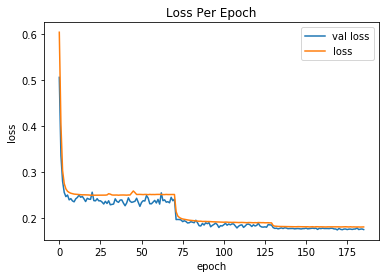

In [15]:
val_losses = results.results['validation_losses']
epochs = np.arange(len(val_losses))
#plt.title(r'Validation Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

losses = results.results['losses']
epochs = np.arange(len(losses))
plt.title('Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses) #plt.subplot(122)

plt.legend(["val loss", "loss"])
plt.show()

from sklearn.preprocessing import minmax_scale
metric = minmax_scale(results.results['metric_per_epoch'], feature_range=(0,1))
epochs = np.arange(len(metric)) * (len(losses) // len(metric))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, metric)

val_losses = - 
minmax_scale(results.results['validation_losses'], feature_range=(0,1))
epochs = np.arange(len(val_losses))
plt.title(r'Early stopping evaluation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, val_losses)

plt.legend(["metric", "val_loss"])
plt.show()

In [16]:
results.results['eval_summary']

{'mean_rank': 0.15807731307222983,
 'hits@k': {1: 0.08,
  3: 0.19666666666666666,
  5: 0.22666666666666666,
  10: 0.30333333333333334},
 'precision': None,
 'recall': None,
 'accuracy': None,
 'f1_score': None}

## Load and evaluate

In [17]:
import torch
import json
import os
import pykeen.constants as pkc
from pykeen.kge_models import get_kge_model
from pykeen.utilities.pipeline import Pipeline

In [18]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

['hpo',
 'KG2E_FB15k_KL_dim50_lr0001_margin1_epochs1000_prediction',
 'KG2E_FB15k_KL_dim50_lr0001_margin1_epochs500',
 'KG2E_FB15k_KL_dim50_lr001_margin1_epochs500',
 'KG2E_KL_FB15k_dim20_lr0001_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr001_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr005_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr01_margin2_epochs1000',
 'KG2E_KL_FB15k_dim20_lr1e-05_margin2_epochs1000',
 'KG2E_KL_FB15k_dim50_lr00001_epochs1000',
 'KG2E_KL_FB15k_dim50_lr0001_margin1_epochs1000',
 'KG2E_KL_FB15k_dim50_lr1e-05_margin1_epochs1000',
 'region_1000epochs',
 'region_20epochs',
 'region_300epochs',
 'region_5epochs',
 'region_dim100_ellipse_rad0_regL01_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad0_regL1e-05_lr0001_loss-NLL_margin0.5_singlepass-True_negfactor1_epochs500',
 'region_dim100_ellipse_rad10_regL1e-05_lr0001_loss-NLL_margin0.0_singlepass-True_negfactor2_epochs50',
 'region_dim100_sphere_rad10_regL1e-05_lr0001_loss-M

In [19]:
model_path = ''
if model_path:
    input_directory = os.path.join(model_dir, model_path)
    results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
    }
    # Initialize KG embedding model
    config = results['final_configuration']
    config['training_set_path'] = 'D:/uni/master/data/FB15K/train.tsv'
    config['test_set_path'] = 'D:/uni/master/data/FB15K/valid.tsv'
    relation_to_id = results['relation_to_id']
    entity_to_id = results['entity_to_id']
else:
    # Initialize KG embedding model
    input_directory = output_directory
    config[pkc.NUM_ENTITIES] = 14951
    config[pkc.NUM_RELATIONS] = 1345
    config[pkc.PREFERRED_DEVICE] = 'gpu'
    relation_to_id = json.load(open(os.path.join(input_directory, 'relation_to_id.json'),'r'))
    entity_to_id = json.load(open(os.path.join(input_directory, 'entity_to_id.json'),'r'))

Get evaluation results:
 * Mean rank
 * Hits@k, k $\in$ {1,3,5,10} 

In [20]:
pipeline = Pipeline(config)
if config['random_seed'] is not None:
    torch.manual_seed(config['random_seed'])
pipeline.entity_label_to_id = entity_to_id
pipeline.relation_label_to_id = relation_to_id
    
model: torch.nn.Module = get_kge_model(config=config)
model.load_state_dict(torch.load(os.path.join(input_directory, 'best_model.pkl')))

#results['trained_model'] = model 
type(model)

pykeen.kge_models.region.Region

In [21]:
metrics = [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION] #  [pkc.MEAN_RANK, pkc.HITS_AT_K, pkc.TRIPLE_PREDICTION]
threshold_search = True

#### Evaluate RelationalTriple

In [22]:
val_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/valid.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/valid_neg.tsv', 
    metrics= metrics,
    threshold_search=True
)

INFO:pykeen.utilities.pipeline:-------------Start Evaluation-------------


KeyboardInterrupt: 

In [ ]:
val_results['eval_summary']

In [ ]:
model.relation_thresholds

In [ ]:
test_results = pipeline.evaluate(
    model, 
    'D:/uni/master/data/FB15K/test.tsv', 
    neg_test_path = 'D:/uni/master/data/FB15K/test_neg.tsv',
    metrics= metrics,
    threshold_search=False
)

In [ ]:
test_results['eval_summary']

In [ ]:
json.dump(val_results['eval_summary'], open(os.path.join(output_directory, 'valid_evaluation_summary.json'),"w"))

In [ ]:
json.dump(test_results['eval_summary'], open(os.path.join(output_directory, 'evaluation_summary.json'),"w"))

## Load results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

In [ ]:
%matplotlib inline

In [ ]:
model_dir = 'D:/uni/master/models/'
models = os.listdir(model_dir)
models

In [ ]:
#output_directory = 'D:/uni/master/models/region_hpo/'
model_path = 'region_FB15k_dim50_sphere_rad0_regL0_lr01_loss-MRL_margin0.5_singlepass-False_negfactor1_epochs1000'
input_directory = os.path.join(model_dir, model_path)


results = {
    'losses': json.load(open(os.path.join(input_directory, 'losses.json'))),
    'validation_losses': json.load(open(os.path.join(input_directory, 'val_losses.json'))),
    'entity_to_embedding': json.load(open(os.path.join(input_directory, 'entities_to_embeddings.json'))),
    'relation_to_embedding': json.load(open(os.path.join(input_directory, 'relations_to_embeddings.json'))),
    'final_configuration': json.load(open(os.path.join(input_directory, 'configuration.json'))),
    'eval_summary': json.load(open(os.path.join(input_directory, 'evaluation_summary.json'))),
    'entity_to_id': json.load(open(os.path.join(input_directory, 'entity_to_id.json'))),
    'relation_to_id': json.load(open(os.path.join(input_directory, 'relation_to_id.json')))
}

In [ ]:
results.keys()

In [ ]:
results['final_configuration']

In [ ]:
losses = results['losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
losses = results['validation_losses']
epochs = np.arange(len(losses))
plt.title(r'Loss Per Epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(epochs, losses)
plt.show()

In [ ]:
results['eval_summary']